In [1]:
import numpy as np
import pandas as pd
import os as os
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    #sns.set_style("white", {
    #    "font.family": "serif",
    #    "font.serif": ["Times", "Palatino", "serif"]
    #})

    sns.set_style("white")
    sns.set_style("ticks")

set_style()

#### When going for publication quality, untick this ####

#plt.rc('text',usetex=True)

In [11]:
def turning_points(array):
    ''' turning_points(array) -> min_indices, max_indices
    Finds the turning points within an 1D array and returns the indices of the minimum and 
    maximum turning points in two separate lists.
    '''
    idx_max, idx_min, val_max, val_min = [], [], [], []
    if (len(array) < 3): 
        return idx_min, idx_max

    NEUTRAL, RISING, FALLING = range(3)
    def get_state(a, b):
        if a < b: return RISING
        if a > b: return FALLING
        return NEUTRAL

    ps = get_state(array[0], array[1])
    begin = 1
    for i in range(2, len(array)):
        s = get_state(array[i - 1], array[i])
        if s != NEUTRAL:
            if ps != NEUTRAL and ps != s:
                if s == FALLING: 
                    idx_max.append((begin + i - 1) // 2)
                    # Only register TS higher than 11 kcal/mol
                    if array[i] > 7.5:
                    #if array[i] > 11:
#                        val_max.append("%.2f"%array[i-1])
                        val_max.append(array[i-1])
                else:
                    idx_min.append((begin + i - 1) // 2)
                    if array[i] > 5:
                        val_min.append(array[i-1])
#                        val_min.append("%.2f"%array[i-1])
            begin = i
            ps = s
#    return idx_max, idx_min, val_max, val_min
            
    return val_max[:2]#, val_min[:1]
    #return idx_min, idx_max|

In [12]:
def turning_points_idx(array):
    ''' turning_points(array) -> min_indices, max_indices
    Finds the turning points within an 1D array and returns the indices of the minimum and 
    maximum turning points in two separate lists.
    '''
    idx_max, idx_min, val_max, val_min = [], [], [], []
    if (len(array) < 3): 
        return idx_min, idx_max

    NEUTRAL, RISING, FALLING = range(3)
    def get_state(a, b):
        if a < b: return RISING
        if a > b: return FALLING
        return NEUTRAL

    ps = get_state(array[0], array[1])
    begin = 1
    for i in range(2, len(array)):
        s = get_state(array[i - 1], array[i])
        if s != NEUTRAL:
            if ps != NEUTRAL and ps != s:
                if s == FALLING: 
                    
                    # Only register TS higher than 11 kcal/mol
                    #if array[i] > 11:
                    if array[i] > 7.5:
                        val_max.append("%.2f"%array[i-1])
                        idx_max.append((begin + i - 1) // 2)
                else:
                    idx_min.append((begin + i - 1) // 2)
                    if array[i] > 5:
                        val_min.append("%.2f"%array[i-1])
            begin = i
            ps = s
#    return idx_max, idx_min, val_max, val_min
            
    return idx_max[:2]#, val_min[:1]
    #return idx_min, idx_max

In [13]:
def min_points_idx(array):
    ''' turning_points(array) -> min_indices, max_indices
    Finds the turning points within an 1D array and returns the indices of the minimum and 
    maximum turning points in two separate lists.
    '''
    idx_max, idx_min, val_max, val_min = [], [], [], []
    if (len(array) < 3): 
        return idx_min, idx_max

    NEUTRAL, RISING, FALLING = range(3)
    def get_state(a, b):
        if a < b: return RISING
        if a > b: return FALLING
        return NEUTRAL

    ps = get_state(array[0], array[1])
    begin = 1
    for i in range(2, len(array)):
        s = get_state(array[i - 1], array[i])
        if s != NEUTRAL:
            if ps != NEUTRAL and ps != s:
                if s == FALLING: 
                    
                    # Only register TS higher than 11 kcal/mol
                    if array[i] > 11:
                        val_max.append("%.2f"%array[i-1])
                        idx_max.append((begin + i - 1) // 2)
                else:
                    
                    if array[i] > 5:
                        idx_min.append((begin + i - 1) // 2)
                        val_min.append("%.2f"%array[i-1])
            begin = i
            ps = s

    return idx_min[0:1]#, idx_max

In [14]:
# A function that returns the following data in this order
#(0: dfs, 1: rxn_list, 2: energy_list, 3: t_points_precise, 4: t_points_full_idx, 5: leg_list, 6: intermediate_full_idx)
def crunch_data(files):
    # Create DF with all files in files
    dfs = []
    for file in files:
        df = pd.read_csv(file, header=None, delim_whitespace=True, names=['Rxn Coord', 'Energy'])
        dfs.append(df)

    # Convert reaction coord and energy column to lists
    rxn_list, energy_list = [], []
    for df in dfs:
        rxn = df['Rxn Coord'].tolist()
        rxn_list.append(rxn)
        energy = df['Energy'].tolist()
        energy_list.append(energy)

    # T points precise
    t_points_precise = []
    for i in energy_list:
        t_points_precise.append(turning_points(i))

    # T points index
    t_points_full_idx = []
    for i in energy_list:
        t_points_full_idx.append(turning_points_idx(i))    

    # Legend
    leg_list = []
    for i in files:
        leg_list.append(i[-19:-16])

    intermediate_full_idx = []
    for i in energy_list:
        intermediate_full_idx.append(min_points_idx(i))
        
    return(dfs, rxn_list, energy_list, t_points_precise, turning_points_idx, leg_list, intermediate_full_idx)

In [5]:
glob_files = sorted(glob.glob('../results/rep_???/neb/kcalnebinfo'))
glob_files

['../results/rep_101/neb/kcalnebinfo',
 '../results/rep_102/neb/kcalnebinfo',
 '../results/rep_103/neb/kcalnebinfo',
 '../results/rep_104/neb/kcalnebinfo',
 '../results/rep_105/neb/kcalnebinfo',
 '../results/rep_106/neb/kcalnebinfo',
 '../results/rep_107/neb/kcalnebinfo',
 '../results/rep_108/neb/kcalnebinfo',
 '../results/rep_109/neb/kcalnebinfo',
 '../results/rep_110/neb/kcalnebinfo',
 '../results/rep_111/neb/kcalnebinfo',
 '../results/rep_112/neb/kcalnebinfo',
 '../results/rep_113/neb/kcalnebinfo',
 '../results/rep_114/neb/kcalnebinfo',
 '../results/rep_115/neb/kcalnebinfo',
 '../results/rep_116/neb/kcalnebinfo',
 '../results/rep_117/neb/kcalnebinfo',
 '../results/rep_118/neb/kcalnebinfo',
 '../results/rep_119/neb/kcalnebinfo',
 '../results/rep_120/neb/kcalnebinfo',
 '../results/rep_121/neb/kcalnebinfo',
 '../results/rep_122/neb/kcalnebinfo',
 '../results/rep_123/neb/kcalnebinfo',
 '../results/rep_124/neb/kcalnebinfo',
 '../results/rep_125/neb/kcalnebinfo']

In [19]:
bb = crunch_data(glob_files)

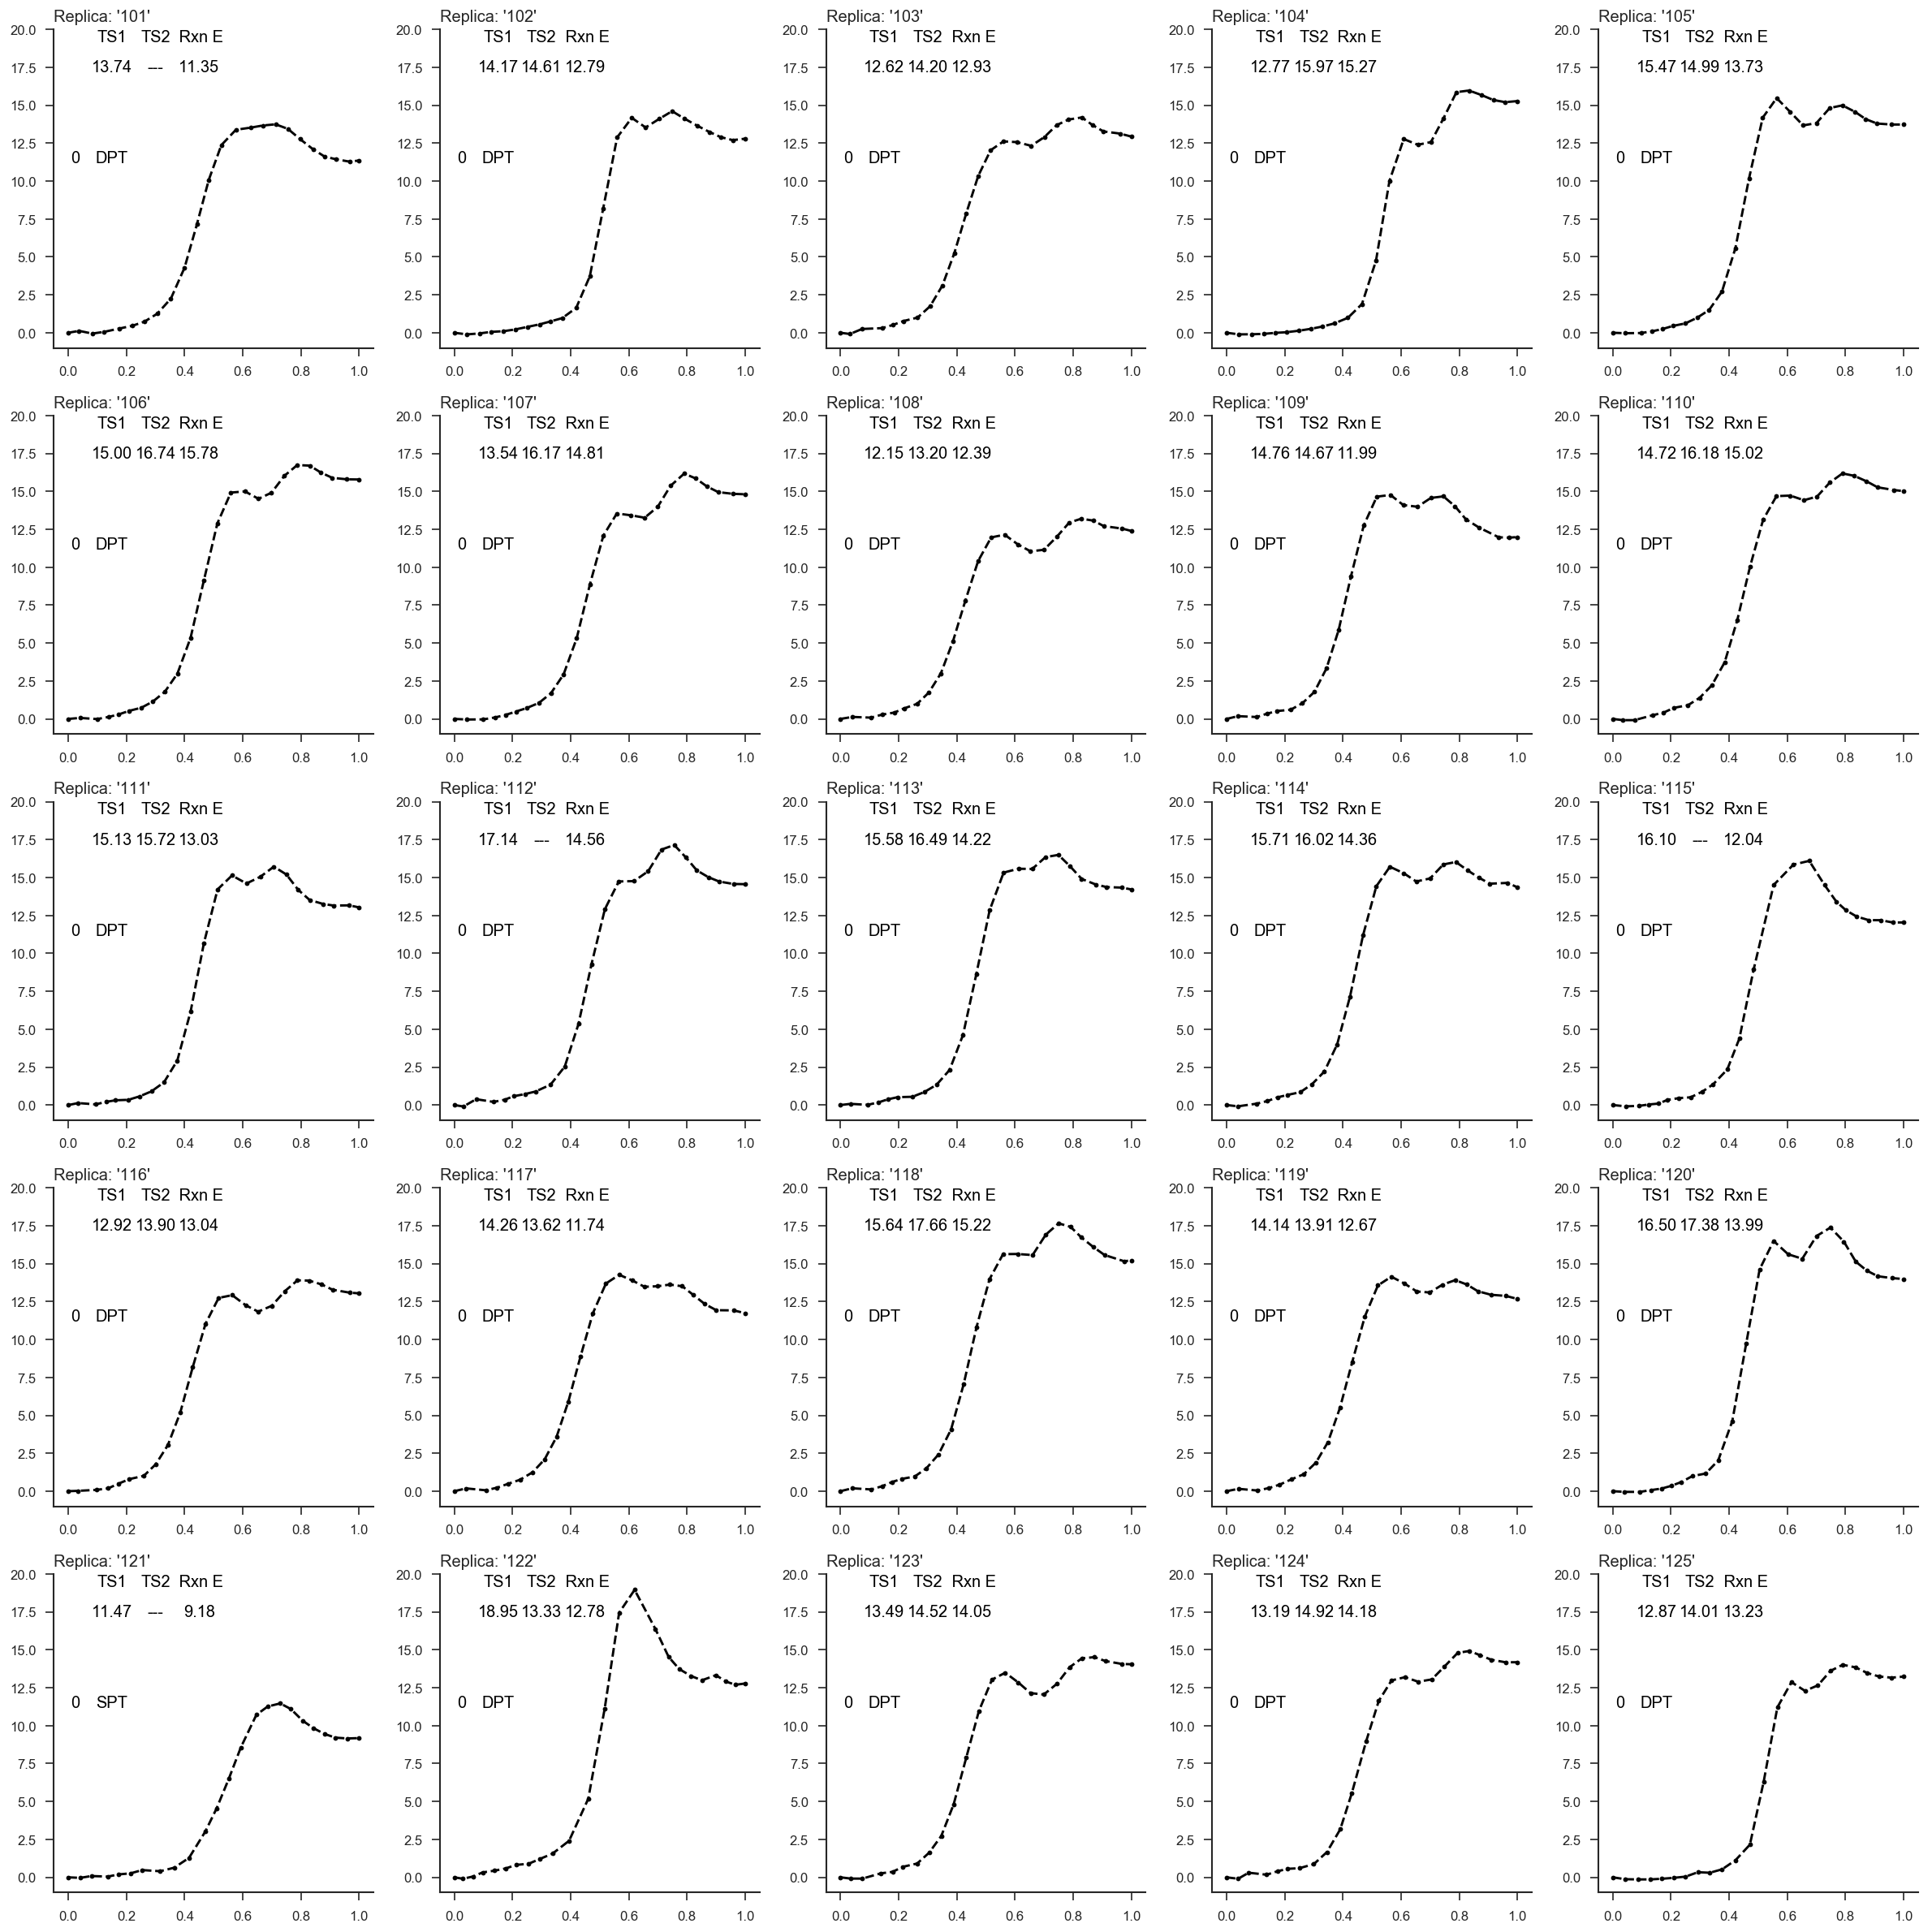

In [22]:
#fig, ax = plt.subplots(dpi=350, figsize=(20,20))
fig, ax = plt.subplots(dpi=120, figsize=(20,20))

nf_color='black'

num=0
for j in np.arange(len(bb[1])):
    num+=1
    plt.subplot(5,5, num)   
    plt.plot(np.array(bb[1][j])/bb[1][j][-1], bb[2][j], color=nf_color, marker='.', linestyle='dashed')    
    
    x=0.15
    plt.text(x, 19.5,'TS1', ha='center', va='center',color=nf_color)
    plt.text(x, 17.5,'%.2f'%bb[3][j][0], ha='center', va='center',color=nf_color)
    
    x=0.3
    plt.text(x, 19.5,'TS2', ha='center', va='center',color=nf_color)
    if len(bb[3][j])==2:
        plt.text(x, 17.5,'%.2f'%bb[3][j][-1], ha='center', va='center',color=nf_color)
    else:
        plt.text(x, 17.5,'---', ha='center', va='center',color=nf_color)
    
    x=0.45
    plt.text(x, 19.5,' Rxn E', ha='center', va='center',color=nf_color)
    plt.text(x, 17.5,'%.2f'%bb[2][j][-1], ha='center', va='center',color=nf_color)

    
    # Axis
    plt.ylim(-1,20)
    
    # Titles
    plt.title('Replica: %r' %(bb[5])[j], loc='left')
    
    x=0.025
    plt.text(x, 11.5,'0', ha='center', va='center',color=nf_color)


    
    x=0.15
    # No field
    if int(bb[5][j]) not in [121]:
        plt.text(x, 11.5, 'DPT', ha='center', va='center',color=nf_color)
    else:
        plt.text(x, 11.5,'SPT', ha='center', va='center',color=nf_color)    
        
# General graph layouts
sns.despine()
plt.tight_layout()

plt.savefig('gc_neb_graphs.png')
plt.show()